In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
import copy

In [3]:
first_df = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")
copy_df = copy.deepcopy(first_df)
copy_df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# maybe i can use one-hot encoding..? im not sure.. i just change this value mannualy
copy_df['Sex'].replace('M',0, inplace=True)
copy_df['Sex'].replace('F',1, inplace=True)

In [6]:
copy_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,0,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,0,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,1,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [7]:
import seaborn as sns

<AxesSubplot:>

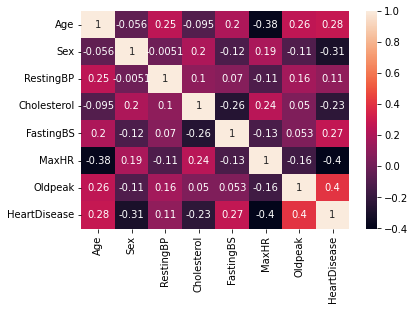

In [8]:
# it skips which dtype is obejct, since they cannot be represent as numeric data unless i change them... so only numeric values's correlations are displayed
sns.heatmap(copy_df.corr(), annot=True)

In [9]:
# maybe i can try labelEncoding to change obejct values into numeric values
from sklearn import preprocessing

In [10]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 86.2+ KB


In [11]:
# let's first check unique of each object type columns's values before we use labelEncoding
print(copy_df['ChestPainType'].unique())
print(copy_df['RestingECG'].unique())
print(copy_df['ExerciseAngina'].unique())
print(copy_df['ST_Slope'].unique())

['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down']


In [12]:
# I refer to this code from sklearn official webpage.. here is the link
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
le = preprocessing.LabelEncoder()

copy_df['ChestPainType']=le.fit_transform(copy_df['ChestPainType'])
copy_df['RestingECG']=le.fit_transform(copy_df['RestingECG'])
copy_df['ExerciseAngina']=le.fit_transform(copy_df['ExerciseAngina'])
copy_df['ST_Slope']=le.fit_transform(copy_df['ST_Slope'])

In [13]:
# we can see all objects change into number values
# ChestPainType['ATA' 'NAP' 'ASY' 'TA'] = [1,2,3,4]
# RestingECG['Normal' 'ST' 'LVH'] = [1,2,3]
# ExerciseAngina['N' 'Y'] = [0,1]  .. oh, we can change yes or no vlaues to 0 and 1
# ST_Slope['Up' 'Flat' 'Down'] = [1,2,3]
copy_df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,1,172,0,0.0,2,0
1,49,1,2,160,180,0,1,156,0,1.0,1,1
2,37,0,1,130,283,0,2,98,0,0.0,2,0
3,48,1,0,138,214,0,1,108,1,1.5,1,1
4,54,0,2,150,195,0,1,122,0,0.0,2,0
5,39,0,2,120,339,0,1,170,0,0.0,2,0
6,45,1,1,130,237,0,1,170,0,0.0,2,0
7,54,0,1,110,208,0,1,142,0,0.0,2,0
8,37,0,0,140,207,0,1,130,1,1.5,1,1
9,48,1,1,120,284,0,1,120,0,0.0,2,0


In [14]:
import matplotlib.pyplot as plt

<AxesSubplot:>

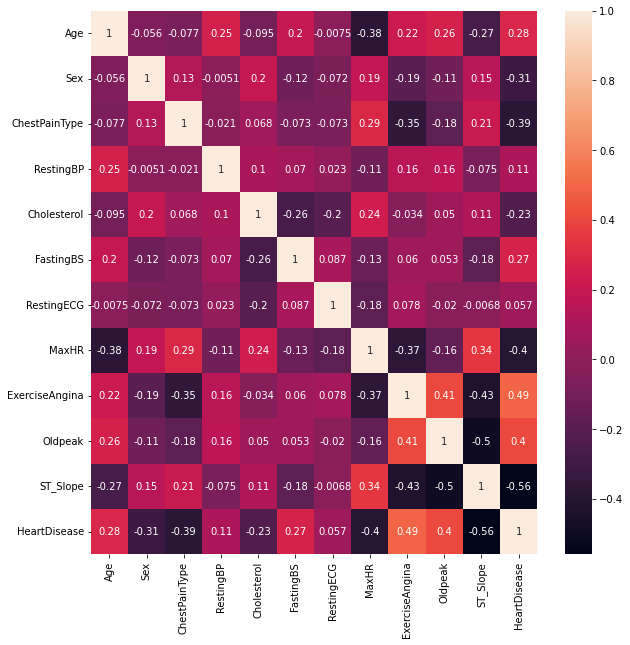

In [15]:
fig, ax = plt.subplots(figsize=(10,10)) # this line of code modify size of plot
sns.heatmap(copy_df.corr(), annot=True) # shows correlations between each value
# as we can see age, oldpeak and ExerciseAngina is correlated with heart disease

In [16]:
# by the way, our goal is to predict a possible heart disease. so let's delete HeartDisease column from our dataset since it is target value we want to predict
x = copy_df.drop(['HeartDisease'], axis=1)
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,1,140,289,0,1,172,0,0.0,2
1,49,1,2,160,180,0,1,156,0,1.0,1
2,37,0,1,130,283,0,2,98,0,0.0,2
3,48,1,0,138,214,0,1,108,1,1.5,1
4,54,0,2,150,195,0,1,122,0,0.0,2


In [17]:
# and split answer(heart disease which is our target)
y = copy_df['HeartDisease']

In [18]:
# here is the link for 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [19]:
print(x_train.shape)

(642, 11)


In [20]:
# So, im going to use adaboost for classification task.. and below link is good place to learn about it
# https://machinelearningmastery.com/boosting-and-adaboost-for-machine-learning/
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

ada_boost_cla = AdaBoostClassifier(n_estimators = 600, learning_rate=0.5,
                                  random_state=0)
ada_model = ada_boost_cla.fit(x_train, y_train)

In [21]:
ada_predictor = ada_model.predict(x_test)
print(ada_predictor)

[0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1
 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0
 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1
 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1
 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0]


In [22]:
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, ada_predictor))

AdaBoost Classifier Model Accuracy: 0.8043478260869565
